## **3) ⚙️ Guardado del modelo con pickle**

#### En este notebook, los paso que realizaré son los siguientes:

<mark>**1.**</mark> Anteriormente, hice un script de Python para ejecutar todas las transformaciones de ingenieria de variables que debo hacerle al dataset (para no tener que ejecutar todo el notebook cada vez). Entonces, ahora lo que hago es pasar el dataset por el pipeline de ingenieria de variables para tener el dataset limpio para usar. 

<mark>**2.**</mark> El siguiente paso es el entrenamiento del modelo.

<mark>**3.**</mark> Finalmente, guardo el modelo con *.pickle*

In [1]:
import sys
sys.path.append('..')

import pandas as pd, json
import pickle
import matplotlib.pyplot as plt
from py.pipeline import Ingenieria

Cargo los datasets necesarios.

#### <mark>**Paso #1**

In [2]:
train = pd.read_csv('../datasets/titanic-train.csv')
train_ext = pd.read_csv('../datasets/titanic-train-extended.csv')

In [3]:
df, transformer = Ingenieria(train, train_ext)
print(df.shape)
df.head()

(798, 16)


,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0.0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,38.0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,26.0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,35.0,53.1000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,35.0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('age_imputer', SimpleImputer(), ['Age'])])

#### <mark>**Paso #2**

In [5]:
from sklearn.model_selection import train_test_split

x, y = df.drop('Survived', axis = 1), df.Survived
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

params = '{"n_estimators":40,"criterion":"gini","max_depth":17,"min_samples_split":2,"min_samples_leaf":2}'
json_params = json.loads(params)
rf = RandomForestClassifier(**json_params, random_state=123).fit(x_train, y_train)
y_pred = rf.predict(x_test)

acc = accuracy_score(y_test, y_pred)

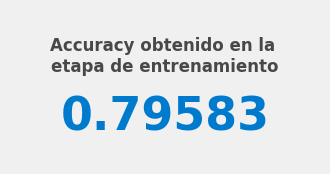

In [9]:
fig, ax = plt.subplots(figsize=(4, 2))
fig.patch.set_facecolor('#f0f0f0')

ax.axis('off')
ax.text(0.5, 0.7, 'Accuracy obtenido en la \netapa de entrenamiento', ha='center', va='center', fontsize=12, color='#484848', weight='bold')
ax.text(0.5, 0.3, f"{acc:.5f}", ha='center', va='center', fontsize=33, color='#007acc', weight='bold')

plt.show()

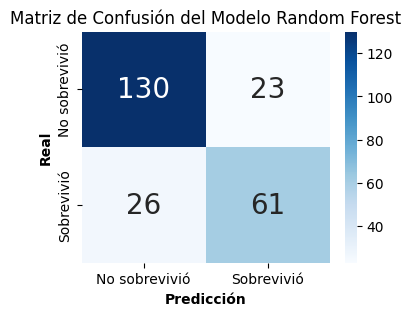

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No sobrevivió', 'Sobrevivió'],
            yticklabels=['No sobrevivió', 'Sobrevivió'],
            annot_kws={"size": 20})

plt.ylabel('Real', fontweight='bold')
plt.xlabel('Predicción', fontweight='bold')
plt.title('Matriz de Confusión del Modelo Random Forest')
plt.show()

#### <mark>**Paso #3**

Finalmente, guardo el transformador y el modelo. Para poder guardar el modelo, es necesario que lo entrene con el total de los datos, es decir, todo X y todo Y.

In [ ]:
rf = RandomForestClassifier(**json_params, random_state=123).fit(x, y)

# Guardado del modelo
with open('../pkl/modelo.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Guardado del transformador
with open('../pkl/transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)